In [158]:
## what is Feature Scaling
## Feature scaling is a method used to normalize the range of independent variables or features of data.
## In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

In [159]:
## Why do we need Feature Scaling?
## In machine learning, we can interpret the range of all features as the weight of the features.

In [160]:
## types of Feature Scaling
## 1. Min-Max Scaling
## 2. Standardization
## 3. Robust Scaling
## 4. Normalization


In [161]:
## standardization
## Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation.

In [162]:
## The formula for standardization is given by:
## z = (x - u) / s


In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day24-standardization/Social_Network_Ads.csv')

In [165]:
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [166]:
df = df.iloc[:, 2:]

In [167]:
df.sample(5)

,Age,EstimatedSalary,Purchased
250,44,39000,0
107,27,89000,0
262,55,125000,1
332,42,65000,0
178,24,23000,0


## Train Test Split 


In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'], test_size=0.3, random_state=0)

In [169]:
X_train.shape, X_test.shape

((280, 2), (120, 2))

## StandardScaler 



In [170]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

## transform the train and test set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [171]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [172]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [173]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [174]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [175]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


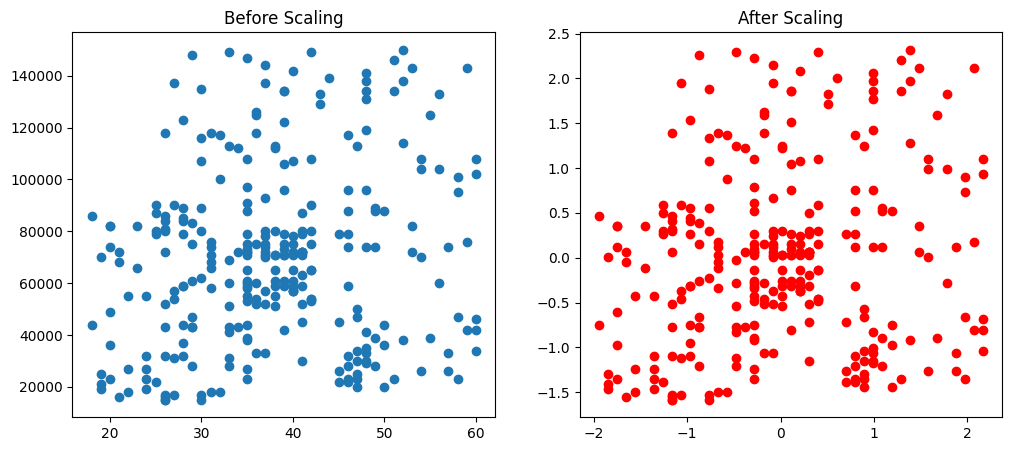

In [176]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

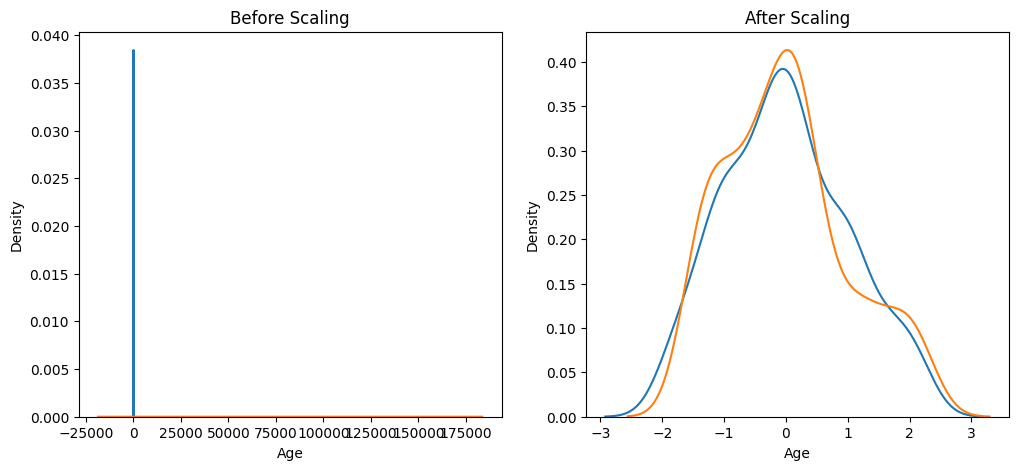

In [177]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

## before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

## after scaling
ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

## Comparison of Distribution 

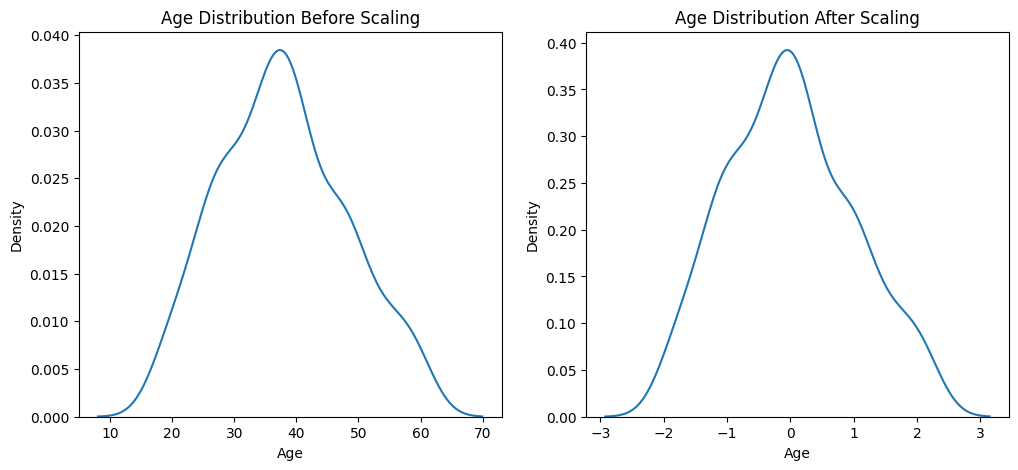

In [178]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

## before scaling
ax1.set_title("Age Distribution Before Scaling")
sns.kdeplot(X_train['Age'], ax=ax1)

## after scaling
ax2.set_title("Age Distribution After Scaling")
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

## Why scaling is important?


In [179]:
from sklearn.linear_model import LogisticRegression


In [180]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [181]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [182]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [183]:
from sklearn.metrics import accuracy_score

In [184]:
print('Accuracy score before scaling: ', accuracy_score(y_test, y_pred))
print('Accuracy score after scaling: ', accuracy_score(y_test, y_pred_scaled))

Accuracy score before scaling:  0.875
Accuracy score after scaling:  0.8666666666666667
